The Nobel Prize has been among the most prestigious international awards since 1901. Each year, 
awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. 
In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal 
with an image of Alfred Nobel (1833 - 1896), who established the prize.

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards 
from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available 
in the `nobel.csv` file. In this project, we explore and answer several questions related to this 
prizewinning data. 

In [26]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Read in data
df = pd.read_csv('data/nobel.csv')

# view data
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [10]:
df.shape

(1000, 18)

In [12]:
# most commonly awarded gender and birth country
top_gender = df['sex'].mode()
top_country = df['birth_country'].mode()

In [14]:
# decade with the highest ratio of US-born nobel prize winners to total winners
# split out decades
def get_decade(year):
    return year // 10 * 10

df['usa_born_winner'] = df['birth_country'] == 'United States of America'
df['decade'] = df['year'].apply(get_decade)
prop_usa_winners = df.groupby('decade', as_index=False)['usa_born_winner'].mean()

# highest ratio of US-born nobel prize winners
max_decade_usa = prop_usa_winners[prop_usa_winners['usa_born_winner'] == prop_usa_winners['usa_born_winner'].max()]['decade'].values[0]


In [16]:
# decade and nobel prize category combination had highest proportion 
# of female winners

df['female_winner'] = df['sex'] == 'Female'

prop_female_winner = df.groupby(['decade', 'category'],as_index=False)['female_winner'].mean()

# create dictionary
decade_key = prop_female_winner.loc[prop_female_winner['female_winner'] == prop_female_winner['female_winner'].max()]['decade'].values[0]
category_value = prop_female_winner.loc[prop_female_winner['female_winner'] == prop_female_winner['female_winner'].max()]['category'].values[0]

max_female_dict = {decade_key: category_value}

In [18]:
# first woman to receive a nobel price and in what category
female_df = df.loc[df['sex'] == 'Female']

# first woman name
first_woman_name = female_df.loc[female_df['year'] == female_df['year'].min()]['full_name'].values[0]

# first woman category
first_woman_category = female_df.loc[female_df['year'] == female_df['year'].min()]['category'].values[0]

In [20]:
# individuals/organizations that have won more than 1 nobel prize
name_list = []
repeat_list = []
name_list = df['full_name'].unique()
for name in name_list:
    if len(df.loc[df['full_name']==name]) > 1:
        repeat_list.append(name)

In [22]:
# Which country and decade with highest proportion of women winners
prop_country_female_winner = df.groupby(['decade', 'birth_country'],as_index=False)['female_winner'].mean()

# create dictionary
decade_country_key = prop_country_female_winner.loc[prop_country_female_winner['female_winner'] == prop_female_winner['female_winner'].max()]['decade'].values[0]
birth_country_value = prop_country_female_winner.loc[prop_country_female_winner['female_winner'] == prop_female_winner['female_winner'].max()]['birth_country'].values[0]


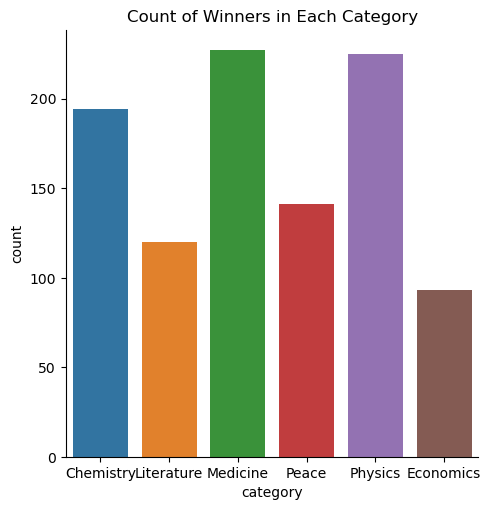

In [30]:
# visualization of count of winners in Each Category
sns.catplot(x='category',
           data = df,
           kind='count',
           hue = 'category')

plt.title('Count of Winners in Each Category')

plt.show()

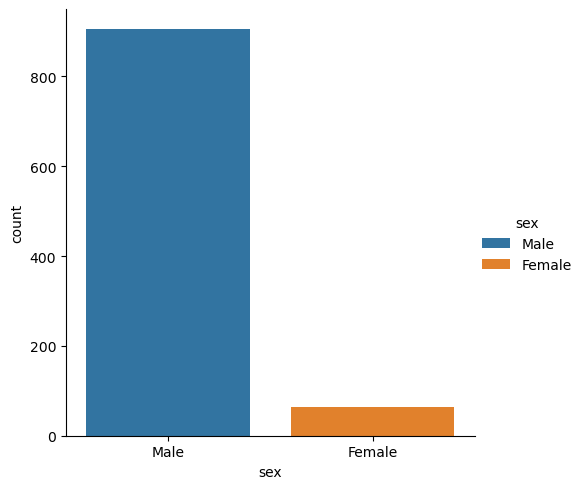

In [32]:
# visualization of men vs women winners
sns.catplot(x='sex',
            data=df,
            kind='count',
            hue='sex')

plt.show()

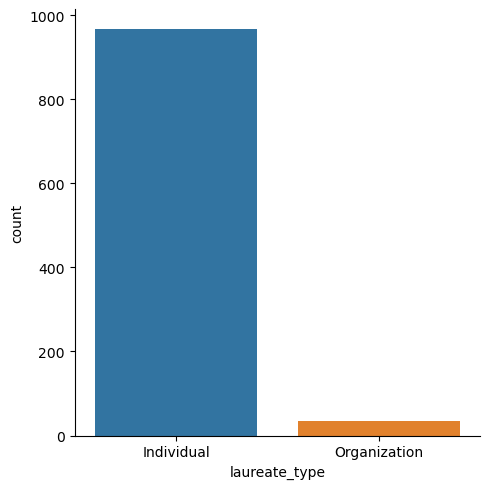

In [34]:
sns.catplot(x='laureate_type',
            data = df,
            kind='count',
            hue = 'laureate_type')

plt.show()